Exploratory analaysis of the filtered callsets.  We create a matrix whose rows are somatic SNVs.  Columns include: annotations from VCF files, clinical variables and variables specific to genomic regions. This latter class of variables contains information on chromatin state (from RoadMap Epigen Consortium), evolutionarily constrain, GWAS and CNV loci associated to schizophrenia...

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import readVCF
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas.plotting as ppl
from sklearn import preprocessing
import re
%matplotlib inline

In [2]:
plt.style.use('classic')

### Annotation of callsets

In [3]:
%%bash
~/projects/bsm/src/readVCF.py -h
if false; then
# run script with default options
~/projects/bsm/src/readVCF.py
fi

usage: readVCF.py [-h] [-d DIR] [-l VCFLIST]

optional arguments:
  -h, --help            show this help message and exit
  -d DIR, --dir DIR     main VCF directory
                        (/home/attila/projects/bsm/results/calls/)
  -l VCFLIST, --vcflist VCFLIST
                        list of samples and VCF files
                        (/big/results/bsm/calls/filtered-vcfs.tsv)


### Loading callsets

In [4]:
calls = readVCF.readVCFs()
calls

Welcome, Attila Jones!



CHROM        POS REF ALT  \
Individual ID Tissue  CHROM POS       Mutation                            
CMC_MSSM_027  NeuN_pl 1     11973569  C->T         1   11973569   C   T   
                            67324428  A->T         1   67324428   A   T   
                            182008461 C->T         1  182008461   C   T   
                            207598957 C->T         1  207598957   C   T   
                            219342012 C->T         1  219342012   C   T   
...                                              ...        ...  ..  ..   
CMC_PITT_118  NeuN_pl 19    29600767  C->T        19   29600767   C   T   
                            58291104  C->T        19   58291104   C   T   
                      X     5889841   G->A         X    5889841   G   A   
                            71258041  C->T         X   71258041   C   T   
                            120533592 C->A         X  120533592   C   A   

                                                   QUAL   FILTER/PASS  \
Individual ID Tissue  CHROM POS       Mutation                          
CMC_MSSM_027  NeuN_pl 1     11973569  C->T        83.07  HC;PASS/PASS   
                            67324428  A->T       203.16  HC;PASS/PASS   
                            182008461 C->T       164.46  HC;PASS/PASS   
                            207598957 C->T       168.14  HC;PASS/PASS   
                            219342012 C->T        78.80  HC;PASS/PASS   
...                                                 ...           ...   
CMC_PITT_118  NeuN_pl 19    29600767  C->T        79.79  HC;PASS/PASS   
                            58291104  C->T        77.85  HC;PASS/PASS   
                      X     5889841   G->A      1084.39  HC;PASS/PASS   
                            71258041  C->T        99.85  HC;PASS/PASS   
                            120533592 C->A        91.24  HC;PASS/PASS   

                                                 FILTER/HC   FILTER/EXT  AC  \
Individual ID Tissue  CHROM POS       Mutation                                
CMC_MSSM_027  NeuN_pl 1     11973569  C->T      HC;PASS/HC  HC;PASS/EXT   1   
                            67324428  A->T      HC;PASS/HC  HC;PASS/EXT   3   
                            182008461 C->T      HC;PASS/HC  HC;PASS/EXT   3   
                            207598957 C->T      HC;PASS/HC  HC;PASS/EXT   3   
                            219342012 C->T      HC;PASS/HC  HC;PASS/EXT   1   
...                                                    ...          ...  ..   
CMC_PITT_118  NeuN_pl 19    29600767  C->T      HC;PASS/HC  HC;PASS/EXT   1   
                            58291104  C->T      HC;PASS/HC  HC;PASS/EXT   2   
                      X     5889841   G->A      HC;PASS/HC  HC;PASS/EXT  10   
                            71258041  C->T      HC;PASS/HC  HC;PASS/EXT   2   
                            120533592 C->A      HC;PASS/HC  HC;PASS/EXT   1   

                                                  AF  ...  mannerOfDeath  \
Individual ID Tissue  CHROM POS       Mutation        ...                  
CMC_MSSM_027  NeuN_pl 1     11973569  C->T      0.02  ...            NaN   
                            67324428  A->T      0.06  ...            NaN   
                            182008461 C->T      0.06  ...            NaN   
                            207598957 C->T      0.06  ...            NaN   
                            219342012 C->T      0.02  ...            NaN   
...                                              ...  ...            ...   
CMC_PITT_118  NeuN_pl 19    29600767  C->T      0.02  ...            NaN   
                            58291104  C->T      0.04  ...            NaN   
                      X     5889841   G->A      0.20  ...            NaN   
                            71258041  C->T      0.04  ...            NaN   
                            120533592 C->A      0.02  ...            NaN   

                                                PMICertain  \
Individual ID Tissue  CHROM POS       Muta

In [5]:
repr(list(calls.columns))

"['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER/PASS', 'FILTER/HC', 'FILTER/EXT', 'AC', 'AF', 'AN', 'BaseQRankSum', 'DP', 'DS', 'END', 'ExcessHet', 'FS', 'InbreedingCoeff', 'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'NEGATIVE_TRAIN_SITE', 'POSITIVE_TRAIN_SITE', 'QD', 'RAW_MQandDP', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'culprit', 'ChromatinState_DLPFC', 'SiPhyLOD', 'SiPhyBranchLen', 'szdbCNVcount', 'GWASpval', 'chromatinState_DLPFC', 'evolConstrain', 'Sample', 'Individual ID', 'Tissue', 'Individual Notes', 'Institution', 'Brain ID', 'SCZ Pair', 'BP Pair', 'Changed (used Affy phenotype)', 'Reported Gender', 'Sex', 'Ethnicity', 'Race', 'Genotype Inferred Ancestry', 'ageOfDeath', 'Date of Death', 'Time of Death', 'Time of Death (Military)', 'Autopsy ID', 'Brain Weight (in grams)', 'PMI (in hours)', 'pH', 'Dx', 'primaryDiagnosisDetail', 'Presence or Absence of Dementia (Y/N)', 'CDR', 'Year of Autopsy', 'Neuropath', 'Neuropath desc', 'Gross Diagnosis', 'Benzodiazepines', 'Anticonvulsants', 'Antipsyc

Text(0, 0.5, '# samples')

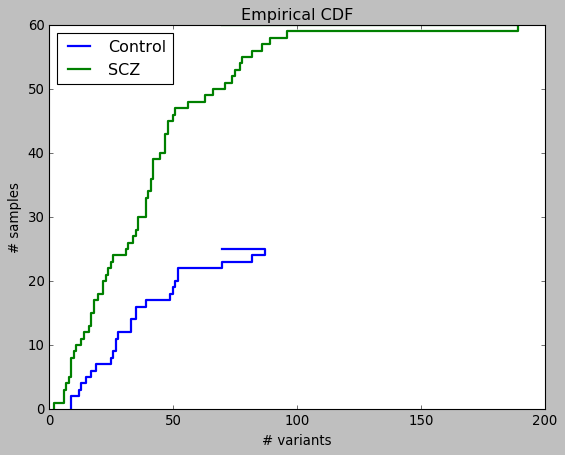

In [29]:
def foo(Dx, ax, xmin=0, xmax=70):
    x = calls.loc[calls['Dx'] == Dx, 'Sample'].value_counts()
    x = x.sort_values()
    ax.step(list(x) + [70], range(len(x) + 1), label=Dx, linewidth=2)
    #df = calls.loc[calls['Dx'] == Dx, :]
    #return(df.groupby('Sample').count()['Dx'])

fig, ax = plt.subplots(figsize=(8, 6))
xmin, xmax = 0, 70
foo('Control', ax)
foo('SCZ', ax)
#ax.set_ylim(0, 11)
ax.legend(loc='upper left')
ax.set_title('Empirical CDF')
ax.set_xlabel('# variants')
ax.set_ylabel('# samples')

### Evolutionary constrain

In [7]:
evol_Dx = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True)
evol_Dx

Dx,Control,SCZ,All
evolConstrain,,,
False,853,2299,3152
True,42,107,149
All,895,2406,3301


(<Figure size 800x480 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f315b772650>,
       dtype=object))

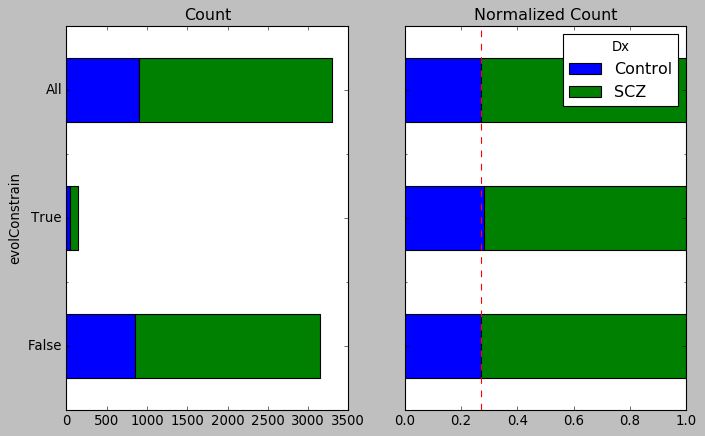

In [8]:
evol_Dx_norm = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True, normalize='index')

def simplebar(df, df_norm):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
    df[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
    ax[1].vlines(df_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
    df_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')
    return((fig, ax))

simplebar(evol_Dx, evol_Dx_norm)

### Chromatin state in DLPFC

In [9]:
state_Dx = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], margins=True)
state_Dx

Dx,Control,SCZ,All
chromatinState_DLPFC,,,
TssA,9,51,60
TssAFlnk,4,16,20
TxFlnk,0,3,3
Tx,30,88,118
TxWk,118,329,447
EnhG,3,7,10
Enh,34,76,110
ZNF/Rpts,2,2,4
Het,10,27,37


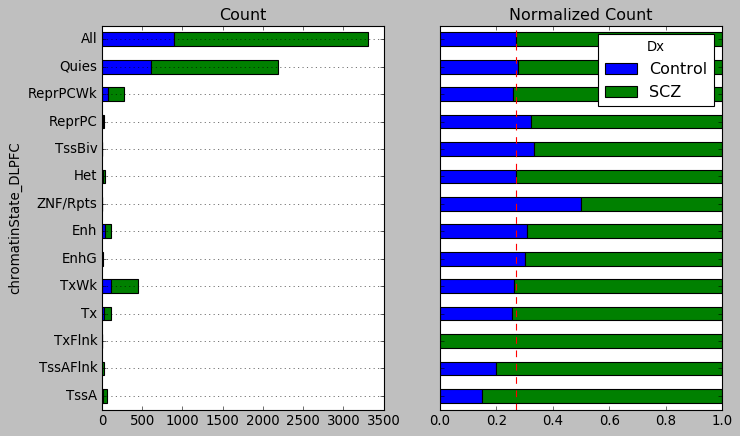

In [10]:
state_Dx_norm = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], normalize='index', margins=True)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
state_Dx[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
ax[0].grid(True, axis='y')
ax[1].vlines(state_Dx_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
state_Dx_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')

### Allele frequency

(2.5, 0.5)

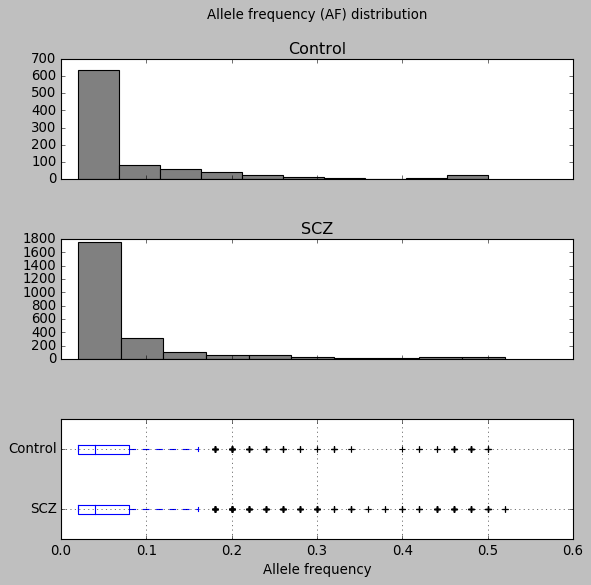

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
calls.hist(column='AF', by='Dx', ax=ax[0:2], grid=True, color='gray')
calls.boxplot('AF', by='Dx', vert=False, ax=ax[2], showfliers=True, color='black')
ax[2].set_xlabel('Allele frequency')
ax[2].set_title('')
fig.suptitle('Allele frequency (AF) distribution')
ax[2].set_ylim(2.5, 0.5)

### Schizophrenia CNVs

The `szdbCNVcount` variable shows the number of occurrence in [SZDB](http://www.szdb.org/) of a CNV---more precisely a single cytogenic band containing or contained in that CNV.  This information was taken from [this table](http://www.szdb.org/download/CNV.txt) in SZDB.  See the `2020-07-24-szdb` article in this notebook.

Text(0, 0.5, '# somatic variants')

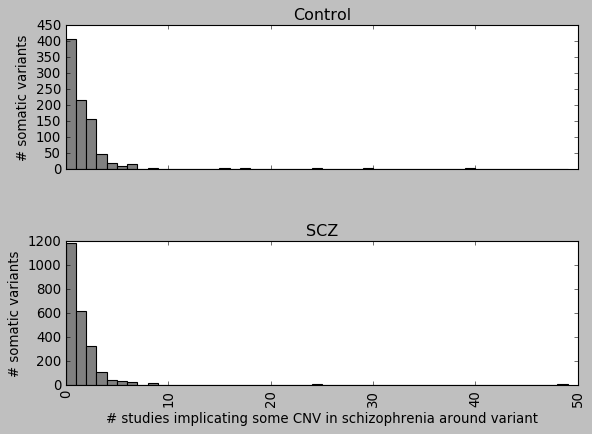

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
calls.hist(column='szdbCNVcount', by='Dx', ax=ax, grid=True, color='gray', bins=range(50))
ax[1].set_xlabel('# studies implicating some CNV in schizophrenia around variant')    
ax[0].set_ylabel('# somatic variants')
ax[1].set_ylabel('# somatic variants')

Text(0.5, 0.98, '# studies implicating some CNV in schizophrenia around variant')

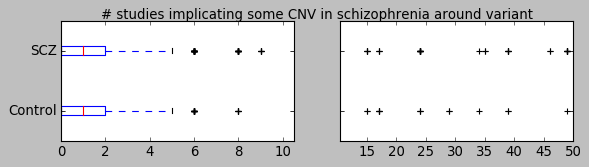

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 2))
def foo(ax):
    calls.boxplot('szdbCNVcount', by='Dx', vert=False, ax=ax, grid=False)
    ax.set_xlabel('')
    ax.set_title('')
    
foo(ax[0])
foo(ax[1])
ax[0].set_xlim([0, 10.5])
ax[1].set_xlim([10.5, 50])
fig.suptitle('# studies implicating some CNV in schizophrenia around variant')

In [14]:
gb = calls.groupby(['Dx', 'Sample', 'szdbCNVcount'])
s = gb.size()
s

Dx       Sample            szdbCNVcount
Control  MSSM_027_NeuN_pl  0               0
                           1               0
                           2               0
                           3               0
                           4               0
                                          ..
SCZ      PITT_118_NeuN_pl  34              0
                           35              0
                           39              0
                           46              0
                           49              0
Length: 3060, dtype: int64

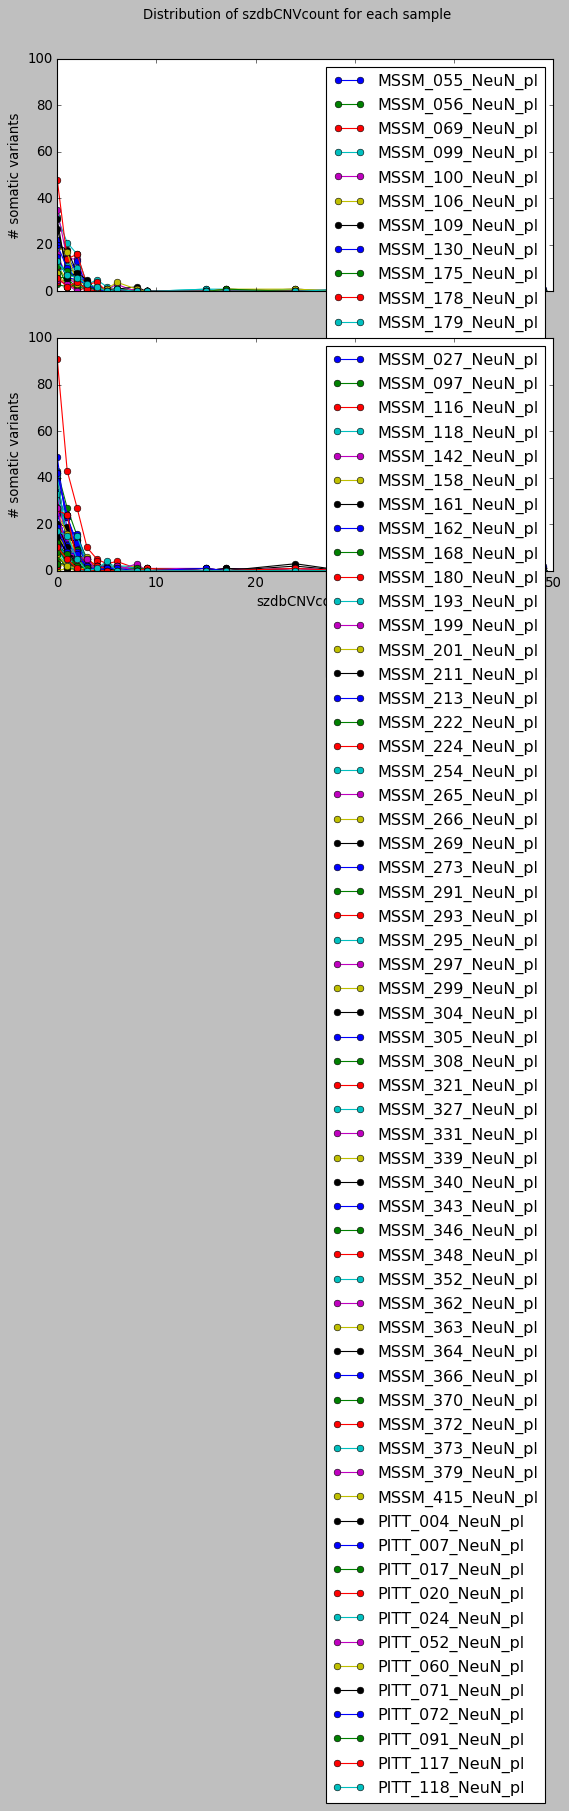

In [15]:
def boo(xlim=None):
    fig, ax = plt.subplots(2, 1, sharey=True, sharex=True, figsize=(8, 8))
    multiix = calls.groupby(['Dx', 'Sample']).size().index
    mycolors = {'Control': 'blue', 'SCZ': 'green'}
    for ix in multiix:
        a = s.loc[ix]
        if a.any():
            Dx = ix[0]
            row = 0 if Dx == 'Control' else 1
            a.plot(marker='o', ax=ax[row], label=ix[1])
            ax[0].set_ylabel('# somatic variants')
            ax[1].set_ylabel('# somatic variants')
            fig.suptitle('Distribution of szdbCNVcount for each sample')
            if xlim is not None:
                ax[0].set_xlim(xlim)
    ax[0].legend()
    ax[1].legend()

boo()

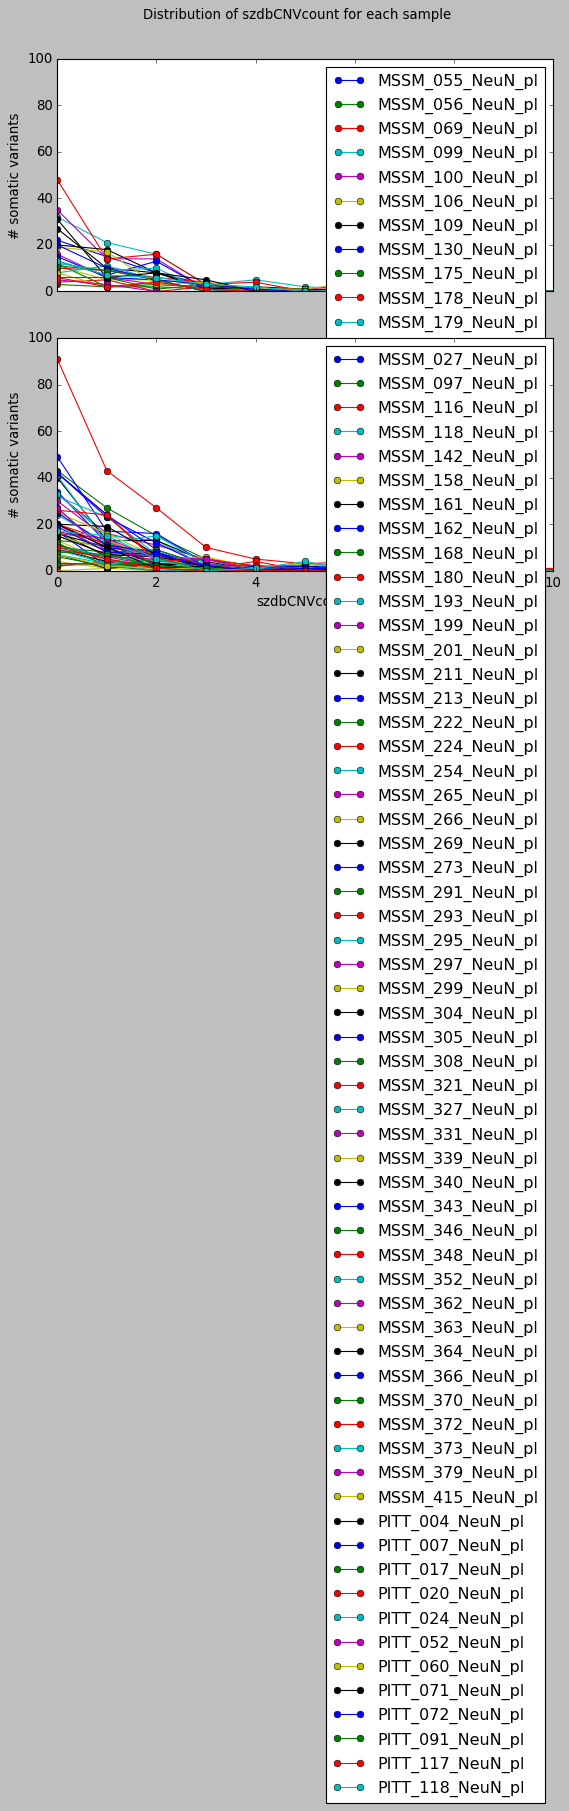

In [16]:
boo([0, 10])

### GWAS

The `GWASpval` variable is $-\log_{10}$ of the p-value from the CLOZUK + PG2 GWAS meta analysis.  See the *2020-07-28-CLOZUK* notebook article.  Note that if a somatic variant is not in the LD block of any of the GWAS loci then I set $\mathrm{GWASpval}=0$.

Below is the number of variants that fall in some GWAS loci

In [17]:
gwas = calls.groupby([calls['GWASpval'] !=0, 'Dx']).size()
gwas

GWASpval  Dx     
False     Control     884
          SCZ        2378
True      Control      11
          SCZ          28
dtype: int64

Text(0, 0.5, 'variants in SCZ GWAS loci')

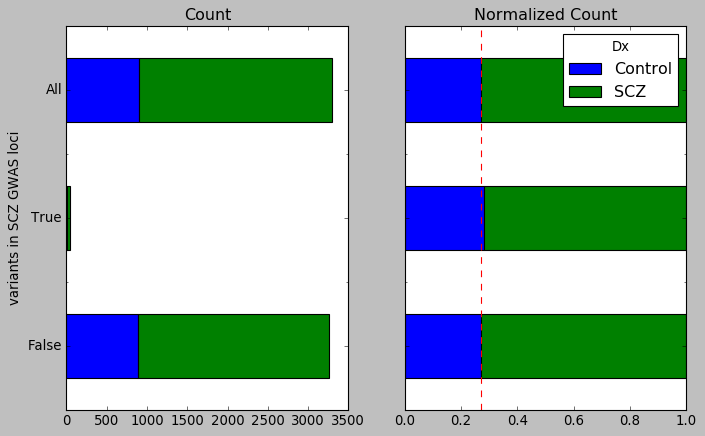

In [18]:
gwas = pd.crosstab(calls['GWASpval'] !=0, calls['Dx'], margins=True)
gwas_norm = pd.crosstab(calls['GWASpval'] !=0, calls['Dx'], margins=True, normalize='index')
fig, ax = simplebar(gwas, gwas_norm)
ax[0].set_ylabel('variants in SCZ GWAS loci')

### Multidimensional view

In [19]:
sel_cols = ['Dx', 'QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'ChromatinState_DLPFC', 'szdbCNVcount']
df = calls.loc[:, sel_cols[1:]]
# First method
df.loc[:, :] = preprocessing.scale(df)
# Second method
#df = (df - df.mean(axis=0)) / df.std(axis=0)
# Third method
#df.loc[:, :] = preprocessing.StandardScaler().fit_transform(df)
df.loc[:, 'Dx'] = calls['Dx']

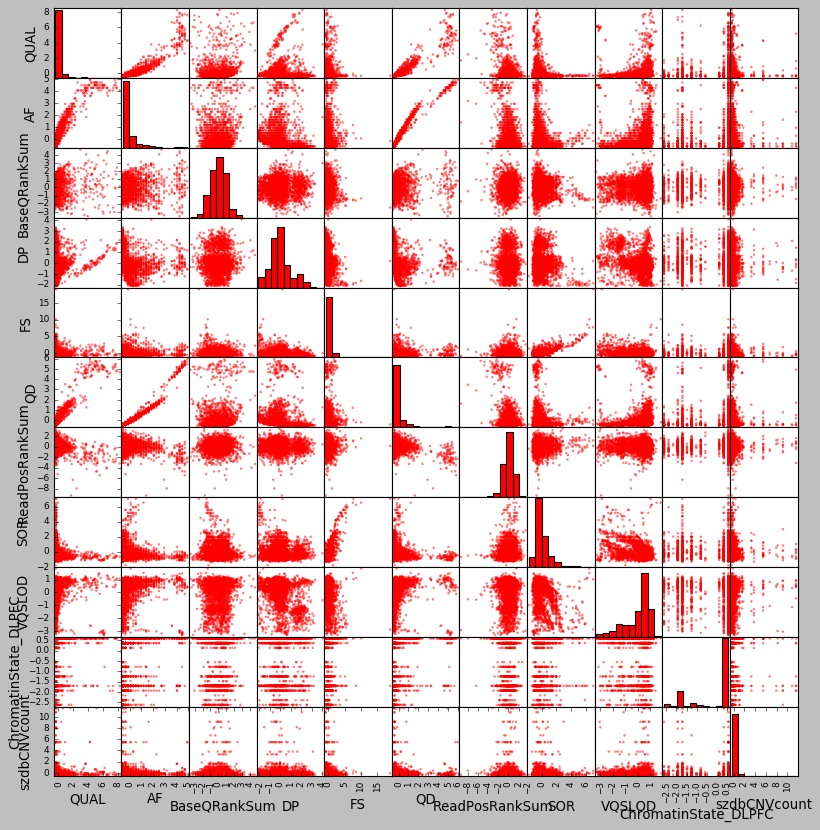

In [20]:
ax = ppl.scatter_matrix(df[sel_cols], diagonal='hist', figsize=(12, 12), color='C2', hist_kwds={'color': 'C2'})

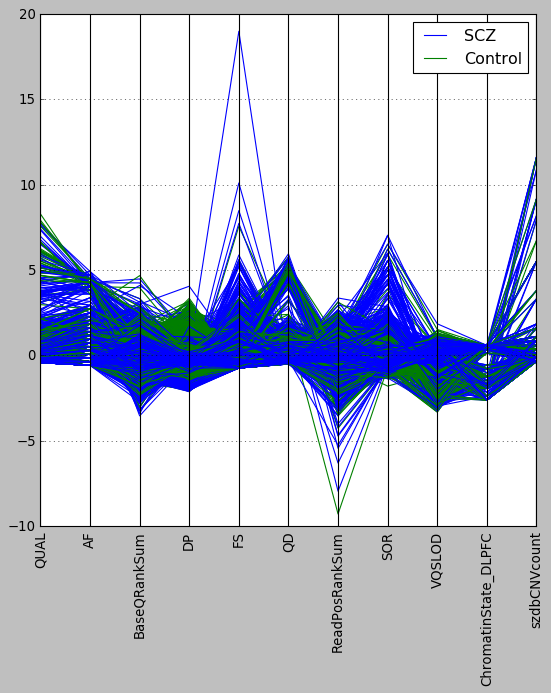

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['C0', 'C1'])
#ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
_ = plt.xticks(rotation=90)

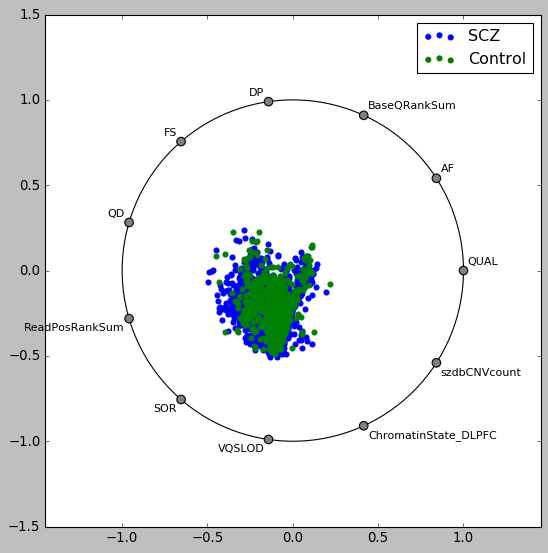

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.radviz(calls.loc[:, sel_cols], class_column='Dx', ax=ax, color=['C0', 'C1'])

### Sample based analysis

In [23]:
sel_annot = ['QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'ReadPosRankSum', 'SOR', 'VQSLOD']
d = {y: [np.mean, np.std] for y in sel_annot}
sel_clinical = ['ageOfDeath', 'Dx', 'Brain Weight (in grams)', 'PMI (in hours)', 'CDR', 'Year of Autopsy', \
                #'AntipsychTyp', 'AntipsychAtyp', 'Antidepress', 'Lithium', 'Tobacco', 'Alcohol', 'Illicitsub'\
               'BMI (Traditional)', 'EV.1', 'EV.2', 'EV.3', 'EV.4', 'EV.5']
d.update({y: 'first' for y in sel_clinical})
callsg = calls.groupby('Sample')
samples = callsg.aggregate(d)
samples


QUAL                     AF           BaseQRankSum  \
                        mean          std      mean       std         mean   
Sample                                                                       
MSSM_027_NeuN_pl  493.074643   796.091443  0.094286  0.110055     1.394286   
MSSM_055_NeuN_pl  251.496735   548.849252  0.046939  0.068380     2.242102   
MSSM_056_NeuN_pl  160.207778    84.631748  0.082222  0.040552     1.131333   
MSSM_069_NeuN_pl  164.519167    71.714983  0.106667  0.032287    -0.287417   
MSSM_097_NeuN_pl  805.140938  1770.829133  0.078125  0.131135     1.063500   
...                      ...          ...       ...       ...          ...   
PITT_098_NeuN_pl  385.486154   275.980395  0.102308  0.059686     0.961385   
PITT_101_NeuN_pl  437.868462   543.456576  0.123077  0.092681     1.000154   
PITT_113_NeuN_pl  818.622121  1607.862054  0.103030  0.159462     0.546909   
PITT_117_NeuN_pl  394.947059   468.976246  0.096471  0.086958     1.080529   
PITT_118_NeuN_pl  283.720476   288.308424  0.066190  0.054188     0.841714   

                                    DP                    FS             ...  \
                       std        mean        std       mean        std  ...   
Sample                                                                   ...   
MSSM_027_NeuN_pl  2.469961  202.892857  27.324766   2.737946   3.867827  ...   
MSSM_055_NeuN_pl  2.001271  255.020408  25.005408   2.351408   2.822638  ...   
MSSM_056_NeuN_pl  2.036603  104.222222  10.802520   1.398000   1.819863  ...   
MSSM_069_NeuN_pl  2.675964   58.916667   6.141636  12.272083  11.296428  ...   
MSSM_097_NeuN_pl  2.669541  372.781250  58.511034   1.965771   2.715713  ...   
...                    ...         ...        ...        ...        ...  ...   
PITT_098_NeuN_pl  1.958133  161.230769  14.475656   2.299462   2.279725  ...   
PITT_101_NeuN_pl  1.917042  130.769231  12.410707   1.480077   1.671059  ...   
PITT_113_NeuN_pl  3.012843  251.727273  22.765479   1.648909   1.838384  ...   
PITT_117_NeuN_pl  1.835480  182.411765  19.419896   3.010176   2.533470  ...   
PITT_118_NeuN_pl  2.103925  221.452381  16.920477   2.593690   2.894319  ...   

                 Brain Weight (in grams) PMI (in hours)   CDR Year of Autopsy  \
                                   first          first first           first   
Sample                                                                          
MSSM_027_NeuN_pl                  1239.0           12.1   1.0          1994.0   
MSSM_055_NeuN_pl                  1370.0           23.9   0.0          2005.0   
MSSM_056_NeuN_pl                  1222.0           16.5   0.0          2005.0   
MSSM_069_NeuN_pl                  1214.0           20.2   0.5          2004.0   
MSSM_097_NeuN_pl                  1036.0           50.6   3.0          1992.0   
...                                  ...            ...   ...             ...   
PITT_098_NeuN_pl                  1285.0           14.5   NaN          1997.0   
PITT_101_NeuN_pl                  1670.0           26.1   NaN          1997.0   
PITT_113_NeuN_pl                  1575.0           16.6   NaN          2000.0   
PITT_117_NeuN_pl                  1565.0           28.0   NaN          2000.0   
PITT_118_NeuN_pl                  1150.0           23.8   NaN          2000.0   

                 BMI (Traditional)      EV.1      EV.2      EV.3      EV.4  \
                             first     first     first     first     first   
Sample                                                                       
MSSM_027_NeuN_pl               NaN  0.019061 -0.043151  0.005808  0.131348   
MSSM_055_NeuN_pl         22.646773  0.020298  0.018617 -0.001543 -0.010232   
MSSM_056_NeuN_pl         47.088470  0.020853  0.030543 -0.006878 -0.011283   
MSSM_069_NeuN_pl               NaN -0.036995 -0.006866 -0.128398  0.015441   
MSSM_097_NeuN_pl               NaN  0.020930  0.033332  0.005796 -0.006970   
...                            ...       ...       

In [24]:
# standardization
noDx = ~samples.columns.isin([('Dx', 'first')])
noDx = [(y, 'first') for y in sel_clinical if not re.match('Dx', y)]
df = samples.loc[:, noDx].copy()
df.loc[:, :] = preprocessing.scale(df)
df[('Dx', 'first')] = samples[('Dx', 'first')]
df.columns = [y[0] for y in df.columns]

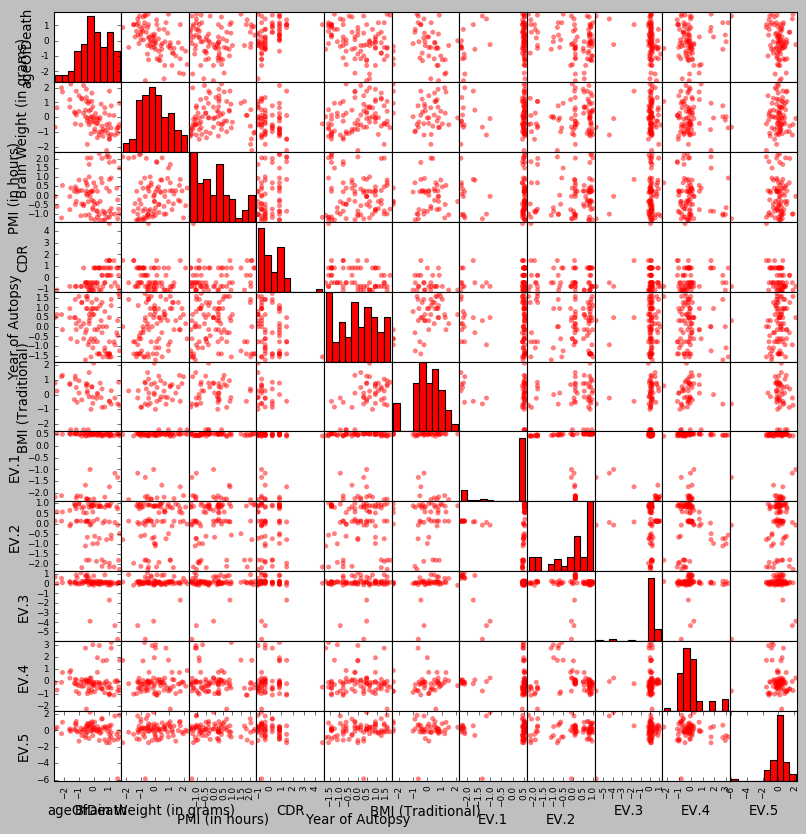

In [25]:
ax = ppl.scatter_matrix(df, diagonal='hist', figsize=(12, 12), color='C2', hist_kwds={'color': 'C2'}, marker='o')

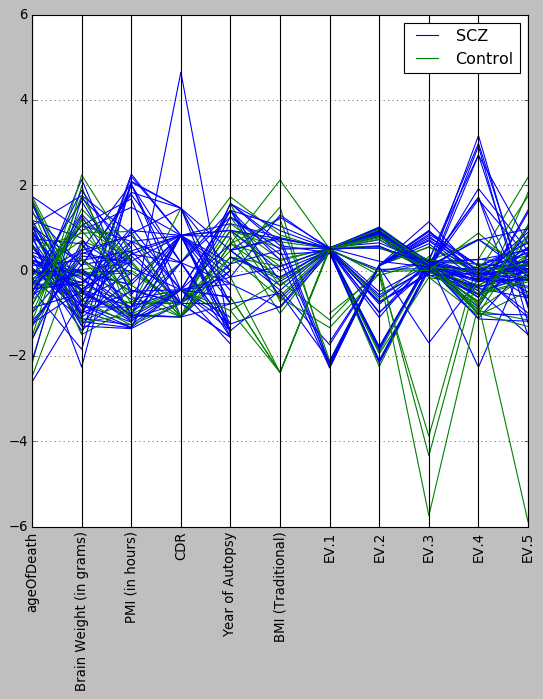

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['C0', 'C1'])
#ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
_ = plt.xticks(rotation=90)

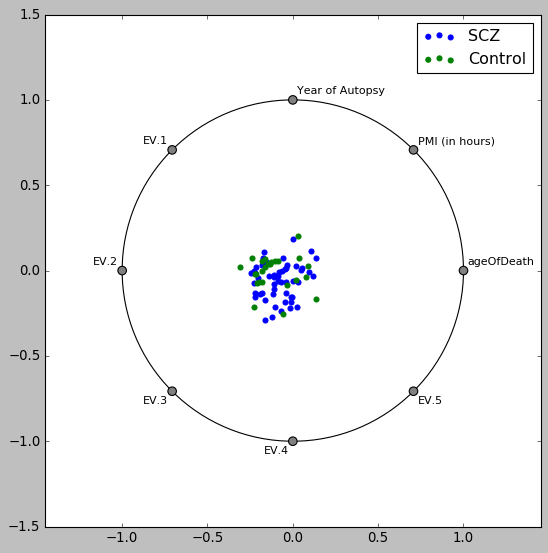

In [27]:
df1 = df.loc[:, ~df.columns.isin(['Brain Weight (in grams)', 'CDR', 'BMI (Traditional)'])]
fig, ax = plt.subplots(figsize=(8, 8))
ppl.radviz(df1, class_column='Dx', ax=ax, color=['C0', 'C1'])

In [28]:
%connect_info

{
  "shell_port": 40883,
  "iopub_port": 58527,
  "stdin_port": 38295,
  "control_port": 54201,
  "hb_port": 41683,
  "ip": "127.0.0.1",
  "key": "51b8650f-f703b0c875dd01a4977c13d1",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d7c932f7-0c64-43d2-aa7f-fc1b6b6605e5.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
